In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_down2_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_down2_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0    [You, are, an, idiot, if, you, thought, anyone...
1                          [No, a, fraud, ., Relax, .]
2                                                [nan]
3    [There, are, 2, aspects, of, security, :, cost...
4    [Since, Litecoin, blocks, are, 4, times, faste...
                           ...                        
0    [So, ,, for, small, disputes, the, chain, or, ...
1    [Yes, ., Delaware, is, preferred, by, VCs, bec...
2    [``, Ethereum, is, an, emerging, economy, ., A...
3    [Need, to, get, up, to, speed, on, the, #, Lib...
4    [Time, to, get, friendly, with, #, Ethereum, 2...
Name: text, Length: 92, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0    [(you, PRP), (are, VBP), (an, DT), (idiot, NN)...
1    [(no, DT), (a, DT), (fraud, NN), (., .), (rela...
2                                          [(nan, NN)]
3    [(there, EX), (are, VBP), (2, CD), (aspects, N...
4    [(since, IN), (litecoin, NN), (blocks, NNS), (...
                           ...                        
0    [(so, RB), (,, ,), (for, IN), (small, JJ), (di...
1    [(yes, RB), (., .), (delaware, NN), (is, VBZ),...
2    [(``, ``), (ethereum, NN), (is, VBZ), (an, DT)...
3    [(need, NN), (to, TO), (get, VB), (up, RP), (t...
4    [(time, NN), (to, TO), (get, VB), (friendly, J...
Name: pos tag, Length: 92, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0    [are, idiot, thought, anyone, gives, anything,...
1                                 [fraud, ., relax, .]
2                                                [nan]
3    [are, aspects, security, :, cost, miner, machi...
4    [litecoin, blocks, are, times, faster, bitcoin...
                           ...                        
0    [,, small, disputes, chain, smart, contract, h...
1    [., delaware, is, preferred, vcs, has, best, d...
2    [``, ethereum, is, emerging, economy, ., eth, ...
3    [need, get, up, speed, #, libra, fiasco, ?, tr...
4    [time, get, friendly, #, ethereum, ., @, tzapu...
Name: text, Length: 92, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

662

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

662


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.004*"feel" + 0.004*"safe" + 0.004*"system" + 0.004*"nikolaos" + 0.004*"rocket" + 0.004*"something" + 0.004*"play" + 0.004*"korea"')
(1, '0.004*"large" + 0.004*"implosion" + 0.004*"larry" + 0.004*"advocate" + 0.004*"news" + 0.004*"reference" + 0.004*"video" + 0.004*"spam"')
(2, '0.004*"secret" + 0.004*"imagine" + 0.004*"address" + 0.004*"wrong" + 0.004*"episode" + 0.004*"merge" + 0.004*"rome" + 0.004*"high"')
(3, '0.004*"regard" + 0.004*"advice" + 0.004*"mention" + 0.004*"mark" + 0.004*"troll" + 0.004*"choose" + 0.004*"coin" + 0.004*"billionth"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

662

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

662

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

657.7808563685305

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.8686239967528288

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.030038529496481007

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
42,"[0.004113364033401012, -0.002451479434967041, ...",retargets,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.469210,0.008622,1.460588,NaN
235,"[-0.0009012302034534514, 0.004489902872592211,...",sooner,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.642766,0.008622,1.634143,NaN
27,"[0.0011870894813910127, -0.004900162108242512,...",pretty,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.681015,0.008622,1.672393,NaN
559,"[-0.004363654647022486, -0.001851751934736967,...",courtmwarner,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.702839,0.017245,1.685594,NaN
570,"[0.003295833943411708, 0.0016849159728735685, ...",dispute,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.748278,0.043111,1.705167,NaN
292,"[0.00419490085914731, 0.0004787416837643832, 0...",onwards,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.727362,0.017245,1.710117,NaN
275,"[0.00151817686855793, -0.0024436628445982933, ...",week,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.742755,0.025867,1.716888,NaN
96,"[0.0002126112813130021, 0.00475264759734273, 0...",coinmine,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.726677,0.008622,1.718055,NaN
410,"[-0.0022226751316338778, -0.001041521551087498...",folk,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.726857,0.008622,1.718235,NaN
312,"[-0.0021761206444352865, 0.0018319135997444391...",gold,0,"[-0.000244757, -0.0003174188, 0.00031427876, -...",0.779278,0.060356,1.718922,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.005078013986349106, -0.002355434698984027,...",bitcoin,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.702051,0.870851,0.831199,NaN
241,"[-0.0007570769521407783, 0.0026863685343414545...",formula,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.551665,0.008622,1.543043,NaN
514,"[0.002242055954411626, -0.0037649967707693577,...",size,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.651550,0.034489,1.617061,NaN
32,"[-0.004088559653609991, -0.0034988990519195795...",time,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.716054,0.094845,1.621209,NaN
236,"[-0.002633234253153205, 0.003261650912463665, ...",combat,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.655481,0.008622,1.646859,NaN
267,"[-0.002082966500893235, -0.002521695103496313,...",morning,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.660038,0.008622,1.651416,NaN
140,"[0.003616676665842533, -0.0002899075916502625,...",many,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.703817,0.051734,1.652084,NaN
106,"[0.003210661234334111, -0.0015046572079882026,...",killer,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.660954,0.008622,1.652331,NaN
425,"[0.004880485590547323, -0.0027168537490069866,...",discovery,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.676035,0.008622,1.667413,NaN
462,"[-0.0026793277356773615, -0.004313818644732237...",share,1,"[-3.2024484e-06, -0.00019814397, -0.0001782020...",0.676905,0.008622,1.668283,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
194,"[0.0011216418351978064, 0.001545127248391509, ...",world,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.534534,0.034489,1.500045,NaN
423,"[-0.00016793502436485142, 0.002008925192058086...",leave,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.655513,0.008622,1.646891,NaN
545,"[-0.0021493968088179827, 0.0004651823255699128...",deep,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.680158,0.008622,1.671535,NaN
524,"[0.002846991876140237, 0.0004309442301746458, ...",break,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.689971,0.008622,1.681349,NaN
474,"[0.003883205121383071, 0.004045823123306036, -...",mark,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.699335,0.008622,1.690713,NaN
616,"[0.0030674096196889877, 0.000734096800442785, ...",usage,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.704909,0.008622,1.696287,NaN
298,"[-0.0023447852581739426, -0.003252531634643674...",sense,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.728615,0.017245,1.711370,NaN
63,"[-0.0035025058314204216, 0.0017768583493307233...",merge,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.728883,0.017245,1.711639,NaN
247,"[0.004339761100709438, 0.001912376843392849, -...",attribute,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.722053,0.008622,1.713431,NaN
5,"[-0.0016916872700676322, 0.001760980230756104,...",free,2,"[-0.00043223632, 0.00032600356, -5.6992136e-05...",0.742471,0.025867,1.716604,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
175,"[0.004047088325023651, 0.004281945992261171, 0...",lose,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.488530,0.017245,1.471286,NaN
90,"[-0.00023426198458764702, 0.004667106550186872...",money,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.670551,0.103468,1.567083,NaN
29,"[-0.0003225822001695633, 0.002040494466200471,...",total,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.632725,0.008622,1.624102,NaN
286,"[-0.0015349766472354531, 0.0021526950877159834...",value,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.671104,0.025867,1.645237,NaN
281,"[-0.0008931379416026175, 0.0004667544853873551...",gemini,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.679044,0.008622,1.670422,NaN
111,"[0.003925287164747715, 0.0028521441854536533, ...",happen,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.709990,0.034489,1.675501,NaN
145,"[0.004797196481376886, 0.0007404726347886026, ...",news,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.709232,0.025867,1.683365,NaN
1,"[-0.0024271574802696705, -0.003514123614877462...",think,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.735677,0.051734,1.683944,NaN
190,"[0.002468566410243511, 0.003886446123942733, 0...",meet,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.721423,0.034489,1.686934,NaN
563,"[0.002823105314746499, 0.004625415429472923, 0...",fortune,3,"[0.0003556567, 0.000698201, 0.0004413584, 0.00...",0.701692,0.008622,1.693070,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

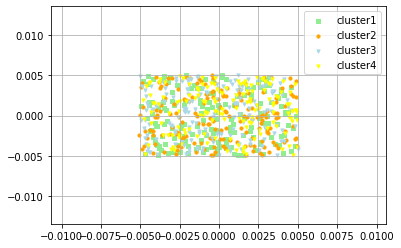

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 인플

173

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

175

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기타

167

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 부정

147

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 13 # 기타
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 2 # 부정

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

0.5349744419421413

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 3 3 2 3 3 0 2 2 3 3 3 3 2 1 0 2 0 3 3 3 2 0 1 3 3 1 1 0 3 1 3 1 2 0 3 3
 3 1 1 1 0 2 2 3 2 1 3 1 3 3 1 2 3 0 3 3 0 2 2 0 3 1 0 2 0 0 1 2 3 0 3 2 3
 2 0 2 0 2 2 1 2 2 0 2 3 2 1 2 1 3 2 1 3 2 2 2 1 3 3 0 3 2 3 2 2 1 3 2 3 0
 3 2 3 3 1 0 0 1 3 2 1 2 1 0 3 3 0 1 0 2 0 2 3 0 1 2 3 3 2 1 2 1 0 0 0 0 3
 2 0 3 0 1 3 3 3 2 0 3 0 0 2 1 3 1 0 1 0 3 3 0 3 0 2 0 0 3 3 1 0 1 1 0 3 3
 2 2 2 3 3 0 2 2 3 3 3 0 1 3 2 2 0 1 2 2 3 0 3 3 2 1 2 3 0 1 1 1 3 0 3 3 2
 1 2 1 1 1 3 2 0 1 1 2 0 3 1 2 2 2 2 3 2 3 0 3 2 2 3 1 1 3 2 1 1 2 2 0 2 0
 0 0 1 2 3 0 0 3 1 2 1 3 1 2 0 0 3 2 3 0 0 2 0 2 0 0 3 0 0 1 0 0 3 3 2 0 3
 0 2 0 0 0 1 3 2 0 2 2 2 2 1 3 0 0 1 3 2 0 0 2 1 3 3 1 2 1 0 2 1 2 3 2 2 1
 2 3 0 1 0 3 2 1 3 2 2 3 3 2 2 1 2 1 1 1 1 1 3 1 0 0 0 2 1 0 1 1 3 3 2 3 1
 0 0 3 0 2 3 3 0 1 0 3 1 3 0 0 2 1 3 2 2 3 1 1 3 0 2 0 0 1 0 3 0 3 0 0 1 1
 1 1 3 0 1 3 3 3 0 2 3 3 0 3 1 2 3 2 0 0 0 0 3 3 3 2 1 3 1 2 0 3 1 2 2 3 2
 2 3 2 0 1 2 0 1 3 0 3 0 0 3 2 1 0 0 2 1 3 0 2 1 2 1 2 2 1 3 3 3

In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.53497446


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.00968196


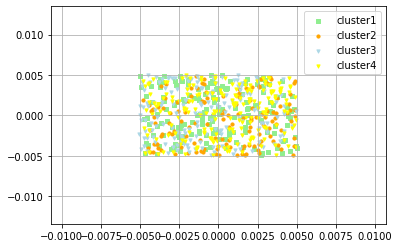

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
159,"[-0.0024594368878751993, -0.004455563612282276...",people,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.029805,0.077601,0.952204,NaN
160,"[0.004117221105843782, 0.002482504351064563, 0...",talk,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.025964,0.068978,0.956986,NaN
312,"[-0.0021761206444352865, 0.0018319135997444391...",gold,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.027505,0.060356,0.967149,NaN
358,"[-0.0005134296952746809, -0.003950719721615314...",fork,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.026855,0.043111,0.983743,NaN
57,"[0.0004469912382774055, 0.0033782690297812223,...",first,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.026973,0.043111,0.983862,NaN
570,"[0.003295833943411708, 0.0016849159728735685, ...",dispute,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.029726,0.043111,0.986615,NaN
190,"[0.002468566410243511, 0.003886446123942733, 0...",meet,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.025989,0.034489,0.991500,NaN
575,"[-0.0006266064010560513, -0.001009831670671701...",legal,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.027403,0.034489,0.992914,NaN
65,"[-0.0024834980722516775, 0.004852340556681156,...",need,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.027748,0.034489,0.993259,NaN
167,"[1.447500198992202e-05, 0.002951769856736064, ...",risk,0,"[-0.00023272588, 0.00016118426, -0.00033286843...",0.027948,0.034489,0.993459,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
32,"[-0.004088559653609991, -0.0034988990519195795...",time,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.026593,0.094845,0.931747,NaN
38,"[0.0034039628226310015, -0.0007458808831870556...",good,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.026843,0.086223,0.940620,NaN
46,"[0.0023955749347805977, -0.0001947500859387219...",release,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.029388,0.068978,0.960410,NaN
30,"[-0.0010298466077074409, 0.0017395511968061328...",litecoin,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.027682,0.060356,0.967326,NaN
421,"[-0.003685864619910717, -0.00422909390181303, ...",system,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.027805,0.060356,0.967449,NaN
140,"[0.003616676665842533, -0.0002899075916502625,...",many,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.026531,0.051734,0.974797,NaN
573,"[0.0002625258930493146, 0.0023976340889930725,...",ethereum,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.027590,0.051734,0.975856,NaN
48,"[0.004874370060861111, 0.004304499831050634, -...",interest,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.028373,0.043111,0.985262,NaN
166,"[-0.003136934246867895, -0.002229150151833892,...",asset,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.029406,0.043111,0.986295,NaN
386,"[0.004473393317312002, 0.001427144045010209, -...",price,1,"[0.00029458216, -0.00063985167, 0.0008866386, ...",0.026135,0.034489,0.991645,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 거래소,돈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.005078013986349106, -0.002355434698984027,...",bitcoin,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.029369,0.870851,0.158518,NaN
91,"[0.000933992036152631, -0.0047691585496068, 0....",http,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.028385,0.103468,0.924918,NaN
45,"[-0.0020989873446524143, 0.001951305428519845,...",code,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.026556,0.086223,0.940333,NaN
280,"[0.001388099160976708, -0.004104245454072952, ...",high,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.028574,0.077601,0.950973,NaN
223,"[0.004929681308567524, 0.0004979997174814343, ...",know,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.028846,0.051734,0.977112,NaN
161,"[-0.002303941175341606, -0.0027782439719885588...",investor,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.029423,0.043111,0.986312,NaN
339,"[-0.005034928675740957, 0.00010171198664465919...",global,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.028131,0.034489,0.993641,NaN
3,"[-0.0012724959524348378, 0.004495327826589346,...",give,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.028849,0.034489,0.994360,NaN
276,"[-0.0013677718816325068, 0.004080615937709808,...",crypto,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.029781,0.034489,0.995292,NaN
466,"[-0.001176781253889203, 0.00033833153429441154...",large,2,"[-0.0007909924, 0.00018571272, 0.0001820554, 0...",0.026346,0.025867,1.000479,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
90,"[-0.00023426198458764702, 0.004667106550186872...",money,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.030703,0.103468,0.927235,NaN
61,"[-0.003725196234881878, 0.0005594634567387402,...",year,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.027558,0.077601,0.949957,NaN
50,"[-0.001965312985703349, 0.000440876348875463, ...",keep,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.026403,0.068978,0.957425,NaN
154,"[-0.002103867707774043, 0.005014709196984768, ...",make,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.030079,0.060356,0.969723,NaN
1,"[-0.0024271574802696705, -0.003514123614877462...",think,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.029163,0.051734,0.977429,NaN
133,"[-0.004210999701172113, 0.00454559875652194, 0...",bank,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.029714,0.051734,0.977981,NaN
31,"[0.0013623498380184174, 0.002175284083932638, ...",block,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.028309,0.043111,0.985197,NaN
101,"[-0.00040600216016173363, -0.00306623661890625...",trade,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.030366,0.043111,0.987255,NaN
111,"[0.003925287164747715, 0.0028521441854536533, ...",happen,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.026546,0.034489,0.992057,NaN
19,"[-0.003524730447679758, -0.004532703198492527,...",network,3,"[0.00034668055, 0.0005215733, -0.000112017806,...",0.027119,0.034489,0.992630,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

164

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #투자

140

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #거래소

167

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #이슈

191

In [89]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈

In [90]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.00968196 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.00968196

In [91]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_down2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_down2_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

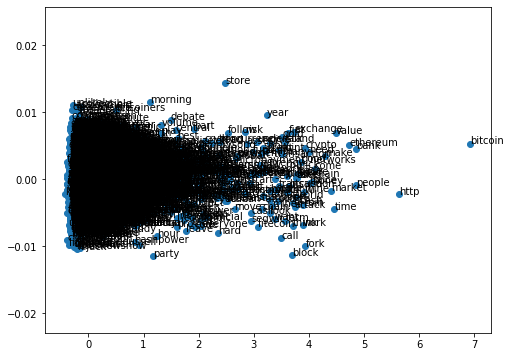

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>